In [1]:
# Author: Guo-Zheng Theodore Yoong, Date: 8/2/2019

import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const

In [2]:
def ode_solve_rk(f, g, y0, t):
    """
    Solves the coupled ODEs, i.e. dx/dt = f(x,y,t) and dy/dt = g(x,y,t), using Runge−Kutta algorithm.

    Input:
    f, g: functions that receives the current state (x and y) and the current position/time (t), and returns the
    derivative values of the state, dx/dt and dy/dt.
    y0: the initial state of the system, given in a column matrix of dimensions 2 x 1 (in this case mass and density).
    t: vector of positions/time steps with length N where the values of y will be returned.

    Output:
    y: 2 x N matrix that contains the values of y at every position/time step. Columns correspond to position/time and
    rows to the element of y.
    """
    N = len(t) # Number of iterations
    h = (t[-1]-t[0])/(N-1) # Step size
    x_curr, y_curr = y0[0][0], y0[1][0] # Initialise current x and y
    y = y0 # Creates a copy of y0
    for i in range(0, N-1): # Python is zero-indexed
        # This loop performs the Runge-Kutta algorithm
        k1 = f(x_curr,y_curr,t[i])
        l1 = g(x_curr,y_curr,t[i])
        k2 = f(x_curr+0.5*h*k1, y_curr+0.5*h*k1, t[i]+0.5*h)
        l2 = g(x_curr+0.5*h*k1, y_curr+0.5*h*k1, t[i]+0.5*h) 
        k3 = f(x_curr+0.5*h*k2, y_curr+0.5*h*k2, t[i]+0.5*h)
        l3 = g(x_curr+0.5*h*k2, y_curr+0.5*h*k2, t[i]+0.5*h)
        k4 = f(x_curr+h*k2, y_curr+h*k2, t[i]+h)
        l4 = g(x_curr+h*k2, y_curr+h*k2, t[i]+h)
        
        # Update next values of x_curr and y_curr
        x_curr, y_curr = x_curr + h*(k1+2*k2+2*k3+k4)/6, y_curr + h*(l1+2*l2+2*l3+l4)/6
        y[0].append(x_curr)
        y[1].append(y_curr)
    return y

In [3]:
def get_nonrel_density(rho0, radius):
    """
    Obtains the density, rho, as function of the radial distance, r, using the implemented ODE solver using the
    non−relativistic equation.

    Input:
    rho0: the central density at r = 0.
    radius: the grid points of radial distance where the density is calculated in form of vector with N elements. Variable
    name changed for consistency.

    Output:
    density: a vector with N elements that contains the density at radial distance given in r. Variable name changed
    for consistency.
    mass: a vector with N elements containing the cumulative mass of the white dwarf from r=0 to the given radial
    distance in r.
    """
    # Initialising constants, all in S.I. units
    h = const.h.value # Planck's constant
    m_e = const.m_e.value # Mass of Electron
    m_p = const.m_p.value # Mass of Proton
    G = const.G.value # Gravitational constant
    
    k = (48*(np.pi**(2/3))*G*m_e*(m_p**(5/3)))/((h**2)*(2**(1/3))*(3**(2/3))) # For calculation of drho_dr
    
    r0 = 10 # An initial radius close to 0 with the central density, but not 0 so that 1/r^2 is defined
    m0 = (4/3)*rho0*np.pi*(r0**3) # The corresponding initial mass
    
    drho_dr = lambda rho, m, r: -k*m*(rho**(1/3))/(r**2) # Lambda function for drho_dr
    dm_dr = lambda rho, m, r: 4*np.pi*rho*(r**2) # Lambda function for dm_dr
    
    init_rho_and_mass = [[rho0], [m0]]
    return ode_solve_rk(drho_dr, dm_dr, init_rho_and_mass, radius) # Here, [[rho],[mass]] is y, and radius is t.

In [4]:
def get_rel_density(rho0, radius):
    """
    Obtains the density, rho, as function of the radial distance, r, using the implemented ODE solver using the
    relativistic equation.

    Input and output is the same as the non-relativistic function.
    """
    # Initialising constants, all in S.I. units
    h = const.h.value # Planck's constant
    m_e = const.m_e.value # Mass of Electron
    m_p = const.m_p.value # Mass of Proton
    G = const.G.value # Gravitational constant
    c = const.c.value # Speed of light
    
    # For calculation of drho_dr
    k = ((2**(7/3))*(3**(1/3))*(np.pi**(1/3))*G*(m_p**(4/3)))/((h**2)*c)
    a = (2**(8/3))*(np.pi**(2/3))*(m_e**2)*(m_p**(2/3))*(c**2)
    b = (3**(2/3))*(h**2)
    
    r0 = 10 # An initial radius close to 0 with the central density, but not 0 so that 1/r^2 is defined
    m0 = (4/3)*rho0*np.pi*(r0**3) # The corresponding initial mass
    
    drho_dr = lambda rho, m, r: -k*m*(rho**(1/3))*np.sqrt(a+b*(rho**(2/3)))/(r**2) # Lambda function for drho_dr
    dm_dr = lambda rho, m, r: 4*np.pi*rho*(r**2) # Lambda function for dm_dr
    
    init_rho_and_mass = [[rho0], [m0]]
    return ode_solve_rk(drho_dr, dm_dr, init_rho_and_mass, radius) # Here, [[rho],[mass]] is y, and radius is t.

In [5]:
# As stated in the script, 5 × 10^7
# We choose an initial rho0 of 10^14
radius = np.linspace(10, 50000000, 10000) # We can filter off NaN Values later
rho0 = 10**14

In [6]:
nonrel_rho_and_mass = get_nonrel_density(rho0, radius) # Error will be raised; ignore
nonrel_density = nonrel_rho_and_mass[0]
nonrel_mass = nonrel_rho_and_mass[1]

/Users/theodoreyoong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


In [7]:
rel_rho_and_mass = get_rel_density(rho0, radius) # Error will be raised; ignore
rel_density = rel_rho_and_mass[0]
rel_mass = rel_rho_and_mass[1]

/Users/theodoreyoong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [15]:
nonrel_radius_scaled = list(map(lambda x: x/(10**6), radius))
nonrel_density_scaled = list(map(lambda x: x/(10**14), nonrel_density))
nonrel_mass_scaled = list(map(lambda x: x/(10**32), nonrel_mass))
rel_radius_scaled = list(map(lambda x: x/(10**5), radius))
rel_density_scaled = list(map(lambda x: x/(10**14), rel_density))
rel_mass_scaled = list(map(lambda x: x/(10**30), rel_mass))

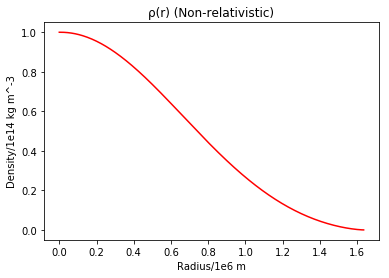

In [16]:
plt.plot(nonrel_radius_scaled, nonrel_density_scaled, c='red', label="Density")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Radius/1e6 m')
plt.ylabel('Density/1e14 kg m^-3')
plt.title('ρ(r) (Non-relativistic)')
plt.show()

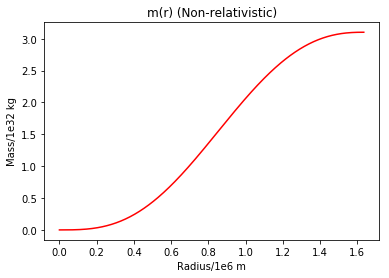

In [17]:
plt.plot(nonrel_radius_scaled, nonrel_mass_scaled, c='red', label="Mass")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Radius/1e6 m')
plt.ylabel('Mass/1e32 kg')
plt.title('m(r) (Non-relativistic)')
plt.show()

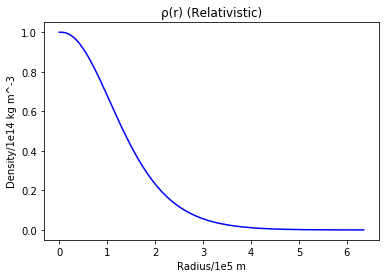

In [18]:
plt.plot(rel_radius_scaled, rel_density_scaled, c='blue', label="Density")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Radius/1e5 m')
plt.ylabel('Density/1e14 kg m^-3')
plt.title('ρ(r) (Relativistic)')
plt.show()

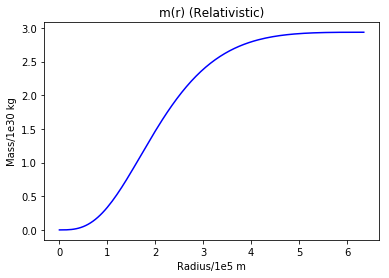

In [19]:
plt.plot(rel_radius_scaled, rel_mass_scaled, c='blue', label="Mass")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Radius/1e5 m')
plt.ylabel('Mass/1e30 kg')
plt.title('m(r) (Relativistic)')
plt.show()

In [20]:
samples = np.logspace(6,14) # Default no. of samples is 50

In [21]:
nonrel_overall_radius = []
nonrel_total_mass = []
for sample in samples:
    nonrel_rho_and_mass = get_nonrel_density(sample, radius) # Error will be raised; ignore
    nonrel_mass = nonrel_rho_and_mass[1]
    nonrel_mass = [val for val in nonrel_mass if val == val]
    lastcount = len(nonrel_mass)
    nonrel_total_mass.append(nonrel_mass[-1])
    nonrel_overall_radius.append(radius[lastcount-1])

/Users/theodoreyoong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


In [22]:
nonrel_overall_radius_scaled = list(map(lambda x: x/(10**7), nonrel_overall_radius))
nonrel_total_mass_scaled = list(map(lambda x: x/(10**32), nonrel_total_mass))

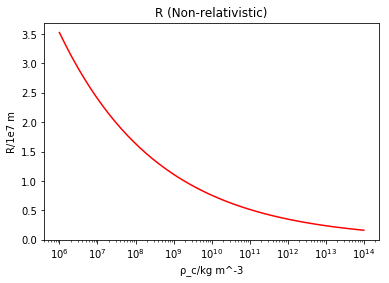

In [23]:
plt.plot(samples, nonrel_overall_radius_scaled, c='red', label="R")
plt.xscale('log')
plt.xlabel('ρ_c/kg m^-3')
plt.ylabel('R/1e7 m')
plt.title('R (Non-relativistic)')
plt.show()

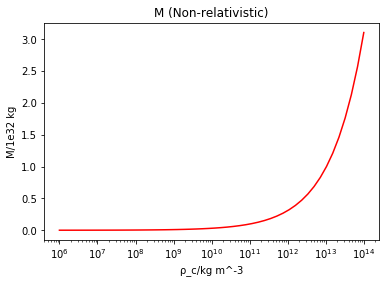

In [24]:
plt.plot(samples, nonrel_total_mass_scaled, c='red', label="M")
plt.xscale('log')
plt.xlabel('ρ_c/kg m^-3')
plt.ylabel('M/1e32 kg')
plt.title('M (Non-relativistic)')
plt.show()

In [25]:
rel_overall_radius = []
rel_total_mass = []
for sample in samples:
    rel_rho_and_mass = get_rel_density(sample, radius) # Error will be raised; ignore
    rel_mass = rel_rho_and_mass[1]
    rel_mass = [val for val in rel_mass if val == val]
    lastcount = len(rel_mass)
    rel_total_mass.append(rel_mass[-1])
    rel_overall_radius.append(radius[lastcount-1])

/Users/theodoreyoong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [26]:
rel_overall_radius_scaled = list(map(lambda x: x/(10**7), rel_overall_radius))
rel_total_mass_scaled = list(map(lambda x: x/(10**30), rel_total_mass))

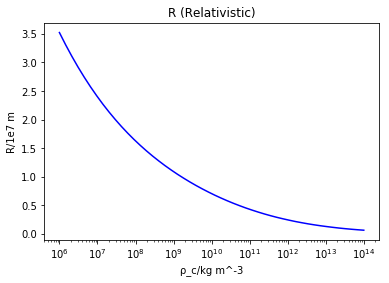

In [27]:
plt.plot(samples, rel_overall_radius_scaled, c='blue', label="R")
plt.xscale('log')
plt.xlabel('ρ_c/kg m^-3')
plt.ylabel('R/1e7 m')
plt.title('R (Relativistic)')
plt.show()

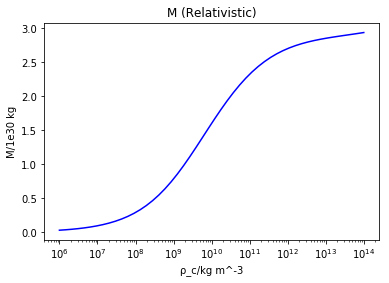

In [30]:
plt.plot(samples, rel_total_mass_scaled, c='blue', label="M")
plt.xscale('log')
plt.xlabel('ρ_c/kg m^-3')
plt.ylabel('M/1e30 kg')
plt.title('M (Relativistic)')
plt.show()

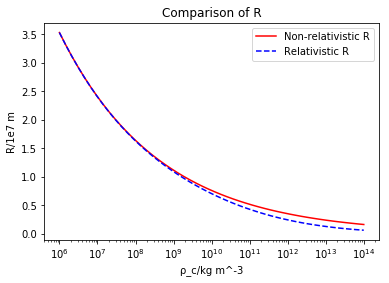

In [32]:
plt.plot(samples, nonrel_overall_radius_scaled, c='red', label="Non-relativistic R")
plt.plot(samples, rel_overall_radius_scaled, c='blue', label="Relativistic R", linestyle='dashed') # Dashed line for relativistic case
plt.xscale('log')
plt.xlabel('ρ_c/kg m^-3')
plt.ylabel('R/1e7 m')
plt.title('Comparison of R')
plt.legend(loc='upper right')
plt.show()

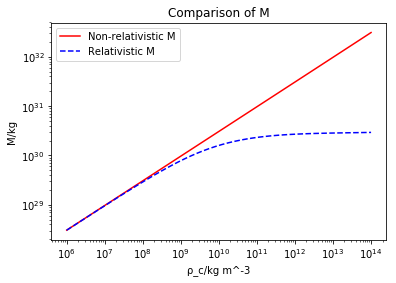

In [33]:
plt.plot(samples, nonrel_total_mass, c='red', label="Non-relativistic M")
plt.plot(samples, rel_total_mass, c='blue', label="Relativistic M", linestyle='dashed') # Dashed line for relativistic case
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ρ_c/kg m^-3')
plt.ylabel('M/kg')
plt.title('Comparison of M')
plt.legend(loc='upper left')
plt.show()

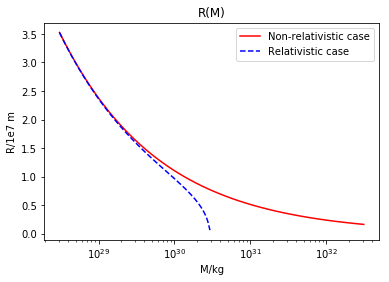

In [35]:
plt.plot(nonrel_total_mass, nonrel_overall_radius_scaled, c='red', label="Non-relativistic case")
plt.plot(rel_total_mass, rel_overall_radius_scaled, c='blue', label="Relativistic case", linestyle='dashed')
plt.xscale('log')
plt.xlabel('M/kg')
plt.ylabel('R/1e7 m')
plt.title('R(M)')
plt.legend(loc='upper right')
plt.show()

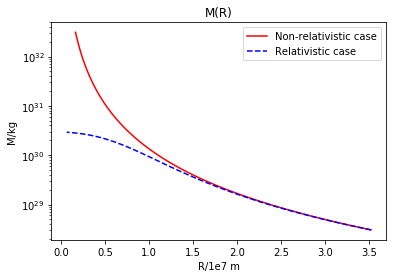

In [37]:
plt.plot(nonrel_overall_radius_scaled, nonrel_total_mass, c='red', label="Non-relativistic case")
plt.plot(rel_overall_radius_scaled, rel_total_mass, c='blue', label="Relativistic case", linestyle='dashed')
plt.yscale('log')
plt.ylabel('M/kg')
plt.xlabel('R/1e7 m')
plt.title('M(R)')
plt.legend(loc='upper right')
plt.show()

In [38]:
M_C = rel_total_mass[-1]
print(M_C)

2.9350238295375957e+30
